<a href="https://colab.research.google.com/github/WiryawanCEO/Oxford17Flower-Classification-Model/blob/main/tl_mobilenetv2_oxford17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library dan depedencies yang akan digunakan

In [ ]:
import tensorflow as tf
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import itertools
import math
import shutil

from sklearn.model_selection import train_test_split
from google.colab import drive
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Buat koneksi dengan Google Drive

In [ ]:
drive.mount('/content/drive')
base = Path('/content/drive/My Drive/')
sys.path.append(str(base))

zip_path = base/'oxford_17_flower_dataset.zip'
!cp '{zip_path}' .

!unzip -q oxford_17_flower_dataset.zip
!rm oxford_17_flower_dataset.zip

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.listdir('oxford_17_flower_dataset')

['Dandelion',
 'Tigerlily',
 'Sunflower',
 'Coltsfoot',
 'Windflower',
 'Buttercup',
 'Lillyvalley',
 'Tulip',
 'Fritillary',
 'Pansy',
 'Daisy',
 'Iris',
 'Crocus',
 'Bluebell',
 'Daffodil',
 'Cowslip',
 'Snowdrop']

In [ ]:
#Create train and validation directory
base_dir = 'oxford_17_flower_dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'valid')
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
#Make directory reference
dandelion_dir = os.path.join(base_dir, 'Dandelion')
crocus_dir = os.path.join(base_dir, 'Crocus')
coltsfoot_dir = os.path.join(base_dir, 'Coltsfoot')
bluebell_dir = os.path.join(base_dir, 'Bluebell')
snowdrop_dir = os.path.join(base_dir, 'Snowdrop')
lillyvalley_dir = os.path.join(base_dir, 'Lillyvalley')
fritillary_dir = os.path.join(base_dir, 'Fritillary')
daffodil_dir = os.path.join(base_dir, 'Daffodil')
tulip_dir = os.path.join(base_dir, 'Tulip')
windflower_dir = os.path.join(base_dir, 'Windflower')
cowslip_dir = os.path.join(base_dir, 'Cowslip')
iris_dir = os.path.join(base_dir, 'Iris')
buttercup_dir = os.path.join(base_dir, 'Buttercup')
tigerlily_dir = os.path.join(base_dir, 'Tigerlily')
daisy_dir = os.path.join(base_dir, 'Daisy')
sunflower_dir = os.path.join(base_dir, 'Sunflower')
pansy_dir = os.path.join(base_dir, 'Pansy')

In [ ]:
#split dataset into train and validation for all class
train_dandelion_dir, val_dandelion_dir = train_test_split(os.listdir(dandelion_dir), test_size = 0.3)
train_crocus_dir, val_crocus_dir = train_test_split(os.listdir(crocus_dir), test_size = 0.3)
train_coltsfoot_dir, val_coltsfoot_dir = train_test_split(os.listdir(coltsfoot_dir), test_size = 0.3)
train_bluebell_dir, val_bluebell_dir = train_test_split(os.listdir(bluebell_dir), test_size = 0.3)
train_snowdrop_dir, val_snowdrop_dir = train_test_split(os.listdir(snowdrop_dir), test_size = 0.3)
train_lillyvalley_dir, val_lillyvalley_dir = train_test_split(os.listdir(lillyvalley_dir), test_size = 0.3)
train_fritillary_dir, val_fritillary_dir = train_test_split(os.listdir(fritillary_dir), test_size = 0.3)
train_daffodil_dir, val_daffodil_dir = train_test_split(os.listdir(daffodil_dir), test_size = 0.3)
train_tulip_dir, val_tulip_dir = train_test_split(os.listdir(tulip_dir), test_size = 0.3)
train_windflower_dir, val_windflower_dir = train_test_split(os.listdir(windflower_dir), test_size = 0.3)
train_cowslip_dir, val_cowslip_dir = train_test_split(os.listdir(cowslip_dir), test_size = 0.3)
train_iris_dir, val_iris_dir = train_test_split(os.listdir(iris_dir), test_size = 0.3)
train_buttercup_dir, val_buttercup_dir = train_test_split(os.listdir(buttercup_dir), test_size = 0.3)
train_tigerlily_dir, val_tigerlily_dir = train_test_split(os.listdir(tigerlily_dir), test_size = 0.3)
train_daisy_dir, val_daisy_dir = train_test_split(os.listdir(daisy_dir), test_size = 0.3)
train_sunflower_dir, val_sunflower_dir = train_test_split(os.listdir(sunflower_dir), test_size = 0.3)
train_pansy_dir, val_pansy_dir = train_test_split(os.listdir(pansy_dir), test_size = 0.3)

In [ ]:
#Create directory for class in train and validation directory

#train directory
train_dandelion = os.path.join(train_dir, 'Dandelion')
os.mkdir(train_dandelion)
train_crocus = os.path.join(train_dir, 'Crocus')
os.mkdir(train_crocus)
train_coltsfoot = os.path.join(train_dir, 'Coltsfoot')
os.mkdir(train_coltsfoot)
train_bluebell = os.path.join(train_dir, 'Bluebell')
os.mkdir(train_bluebell)
train_snowdrop = os.path.join(train_dir, 'Snowdrop')
os.mkdir(train_snowdrop)
train_lillyvalley = os.path.join(train_dir, 'Lillyvalley')
os.mkdir(train_lillyvalley)
train_fritillary = os.path.join(train_dir, 'Fritillary')
os.mkdir(train_fritillary)
train_daffodil = os.path.join(train_dir, 'Daffodil')
os.mkdir(train_daffodil)
train_tulip = os.path.join(train_dir, 'Tulip')
os.mkdir(train_tulip)
train_windflower = os.path.join(train_dir, 'Windflower')
os.mkdir(train_windflower)
train_cowslip = os.path.join(train_dir, 'Cowslip')
os.mkdir(train_cowslip)
train_iris = os.path.join(train_dir, 'Iris')
os.mkdir(train_iris)
train_buttercup = os.path.join(train_dir, 'Buttercup')
os.mkdir(train_buttercup)
train_tigerlily = os.path.join(train_dir, 'Tigerlily')
os.mkdir(train_tigerlily)
train_daisy = os.path.join(train_dir, 'Daisy')
os.mkdir(train_daisy)
train_sunflower = os.path.join(train_dir, 'Sunflower')
os.mkdir(train_sunflower)
train_pansy = os.path.join(train_dir, 'Pansy')
os.mkdir(train_pansy)

#val directory
val_dandelion = os.path.join(validation_dir, 'Dandelion')
os.mkdir(val_dandelion)
val_crocus = os.path.join(validation_dir, 'Crocus')
os.mkdir(val_crocus)
val_coltsfoot = os.path.join(validation_dir, 'Coltsfoot')
os.mkdir(val_coltsfoot)
val_bluebell = os.path.join(validation_dir, 'Bluebell')
os.mkdir(val_bluebell)
val_snowdrop = os.path.join(validation_dir, 'Snowdrop')
os.mkdir(val_snowdrop)
val_lillyvalley = os.path.join(validation_dir, 'Lillyvalley')
os.mkdir(val_lillyvalley)
val_fritillary = os.path.join(validation_dir, 'Fritillary')
os.mkdir(val_fritillary)
val_daffodil = os.path.join(validation_dir, 'Daffodil')
os.mkdir(val_daffodil)
val_tulip = os.path.join(validation_dir, 'Tulip')
os.mkdir(val_tulip)
val_windflower = os.path.join(validation_dir, 'Windflower')
os.mkdir(val_windflower)
val_cowslip = os.path.join(validation_dir, 'Cowslip')
os.mkdir(val_cowslip)
val_iris = os.path.join(validation_dir, 'Iris')
os.mkdir(val_iris)
val_buttercup = os.path.join(validation_dir, 'Buttercup')
os.mkdir(val_buttercup)
val_tigerlily = os.path.join(validation_dir, 'Tigerlily')
os.mkdir(val_tigerlily)
val_daisy = os.path.join(validation_dir, 'Daisy')
os.mkdir(val_daisy)
val_sunflower = os.path.join(validation_dir, 'Sunflower')
os.mkdir(val_sunflower)
val_pansy = os.path.join(validation_dir, 'Pansy')
os.mkdir(val_pansy)

In [ ]:
#Copy datasets to new directory
#train directory
for i in train_dandelion_dir:
  shutil.copy(os.path.join(dandelion_dir, i), os.path.join(train_dandelion, i))
for i in train_crocus_dir:
  shutil.copy(os.path.join(crocus_dir, i), os.path.join(train_crocus, i))
for i in train_coltsfoot_dir:
  shutil.copy(os.path.join(coltsfoot_dir, i), os.path.join(train_coltsfoot, i))
for i in train_bluebell_dir:
  shutil.copy(os.path.join(bluebell_dir, i), os.path.join(train_bluebell, i))
for i in train_snowdrop_dir:
  shutil.copy(os.path.join(snowdrop_dir, i), os.path.join(train_snowdrop, i))
for i in train_lillyvalley_dir:
  shutil.copy(os.path.join(lillyvalley_dir, i), os.path.join(train_lillyvalley, i))
for i in train_fritillary_dir:
  shutil.copy(os.path.join(fritillary_dir, i), os.path.join(train_fritillary, i))
for i in train_daffodil_dir:
  shutil.copy(os.path.join(daffodil_dir, i), os.path.join(train_daffodil, i))
for i in train_tulip_dir:
  shutil.copy(os.path.join(tulip_dir, i), os.path.join(train_tulip, i))
for i in train_windflower_dir:
  shutil.copy(os.path.join(windflower_dir, i), os.path.join(train_windflower, i))
for i in train_cowslip_dir:
  shutil.copy(os.path.join(cowslip_dir, i), os.path.join(train_cowslip, i))
for i in train_iris_dir:
  shutil.copy(os.path.join(iris_dir, i), os.path.join(train_iris, i))
for i in train_buttercup_dir:
  shutil.copy(os.path.join(buttercup_dir, i), os.path.join(train_buttercup, i))
for i in train_tigerlily_dir:
  shutil.copy(os.path.join(tigerlily_dir, i), os.path.join(train_tigerlily, i))
for i in train_daisy_dir:
  shutil.copy(os.path.join(daisy_dir, i), os.path.join(train_daisy, i))
for i in train_sunflower_dir:
  shutil.copy(os.path.join(sunflower_dir, i), os.path.join(train_sunflower, i))
for i in train_pansy_dir:
  shutil.copy(os.path.join(pansy_dir, i), os.path.join(train_pansy, i))

#val directory
for i in val_dandelion_dir:
  shutil.copy(os.path.join(dandelion_dir, i), os.path.join(val_dandelion, i))
for i in val_crocus_dir:
  shutil.copy(os.path.join(crocus_dir, i), os.path.join(val_crocus, i))
for i in val_coltsfoot_dir:
  shutil.copy(os.path.join(coltsfoot_dir, i), os.path.join(val_coltsfoot, i))
for i in val_bluebell_dir:
  shutil.copy(os.path.join(bluebell_dir, i), os.path.join(val_bluebell, i))
for i in val_snowdrop_dir:
  shutil.copy(os.path.join(snowdrop_dir, i), os.path.join(val_snowdrop, i))
for i in val_lillyvalley_dir:
  shutil.copy(os.path.join(lillyvalley_dir, i), os.path.join(val_lillyvalley, i))
for i in val_fritillary_dir:
  shutil.copy(os.path.join(fritillary_dir, i), os.path.join(val_fritillary, i))
for i in val_daffodil_dir:
  shutil.copy(os.path.join(daffodil_dir, i), os.path.join(val_daffodil, i))
for i in val_tulip_dir:
  shutil.copy(os.path.join(tulip_dir, i), os.path.join(val_tulip, i))
for i in val_windflower_dir:
  shutil.copy(os.path.join(windflower_dir, i), os.path.join(val_windflower, i))
for i in val_cowslip_dir:
  shutil.copy(os.path.join(cowslip_dir, i), os.path.join(val_cowslip, i))
for i in val_iris_dir:
  shutil.copy(os.path.join(iris_dir, i), os.path.join(val_iris, i))
for i in val_buttercup_dir:
  shutil.copy(os.path.join(buttercup_dir, i), os.path.join(val_buttercup, i))
for i in val_tigerlily_dir:
  shutil.copy(os.path.join(tigerlily_dir, i), os.path.join(val_tigerlily, i))
for i in val_daisy_dir:
  shutil.copy(os.path.join(daisy_dir, i), os.path.join(val_daisy, i))
for i in val_sunflower_dir:
  shutil.copy(os.path.join(sunflower_dir, i), os.path.join(val_sunflower, i))
for i in val_pansy_dir:
  shutil.copy(os.path.join(pansy_dir, i), os.path.join(val_pansy, i))

In [ ]:
dandeliontrainCount = len(os.listdir(train_dandelion))
dandelionvalidCount = len(os.listdir(val_dandelion))
trainCount = 17 * dandeliontrainCount
validCount = 17 * dandelionvalidCount
print(trainCount)
print(validCount)

952
408


Definisikan direktori dataset di Google Drive, serta setup datagenerator dataset training & validasi

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

Masukan dataset kedalam generator berdasarkan batch, kemudian resize ke ukuran 224x224 dengan mode kelas berdasarkan kategorikal

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=68,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=51,
        shuffle=False,
        class_mode='categorical')

Found 952 images belonging to 17 classes.
Found 408 images belonging to 17 classes.


Buat file labels.txt untuk referensi label kelas di implementasi nantinya sekaligus digunakan pada tahap evaluasi dengan confusion matrix dan classification report

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Bluebell': 0, 'Buttercup': 1, 'Coltsfoot': 2, 'Cowslip': 3, 'Crocus': 4, 'Daffodil': 5, 'Daisy': 6, 'Dandelion': 7, 'Fritillary': 8, 'Iris': 9, 'Lillyvalley': 10, 'Pansy': 11, 'Snowdrop': 12, 'Sunflower': 13, 'Tigerlily': 14, 'Tulip': 15, 'Windflower': 16}


Import model pre-trained MobileNet V2 dari keras.applications(), tentukan input shapenya menjadi 224x224, instruksikan untuk tidak menggunakan lapisan akhir model, dan pilih wightsnya ImageNet

In [ ]:
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               alpha=1.0,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


Freeze lapisan-lapisan yang ada di model pre-trained MobileNet v2

In [ ]:
base_model.trainable = False

Buat dan gabungkan lapisan fully connected yang dibuat dengan model pre-trained yang sudah di bekukan

In [ ]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(17, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 17)                1066257   
Total params: 3,324,241
Trainable params: 1,066,257
Non-trainable params: 2,257,984
_________________________________________________________________


Konfigurasi parameter pelatihan dan mulai proses training-nya

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['categorical_accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=14,  # 952 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,  # 408 images = batch_size * steps
      verbose=1)

Epoch 1/20
14/14 [==============================] - 8s 575ms/step - loss: 1.8525 - categorical_accuracy: 0.4695 - val_loss: 0.8624 - val_categorical_accuracy: 0.7279
Epoch 2/20
14/14 [==============================] - 7s 529ms/step - loss: 0.1932 - categorical_accuracy: 0.9527 - val_loss: 0.5810 - val_categorical_accuracy: 0.8211
Epoch 3/20
14/14 [==============================] - 7s 526ms/step - loss: 0.0448 - categorical_accuracy: 0.9926 - val_loss: 0.5160 - val_categorical_accuracy: 0.8431
Epoch 4/20
14/14 [==============================] - 7s 525ms/step - loss: 0.0150 - categorical_accuracy: 0.9989 - val_loss: 0.5067 - val_categorical_accuracy: 0.8333
Epoch 5/20
14/14 [==============================] - 7s 524ms/step - loss: 0.0094 - categorical_accuracy: 1.0000 - val_loss: 0.4834 - val_categorical_accuracy: 0.8505
Epoch 6/20
14/14 [==============================] - 8s 537ms/step - loss: 0.0070 - categorical_accuracy: 1.0000 - val_loss: 0.4644 - val_categorical_accuracy: 0.8578
Epoc

Evaluasi hasil pelatihan dengan grafik visualisasi proses training

Text(0.5, 1.0, 'Training and validation loss')

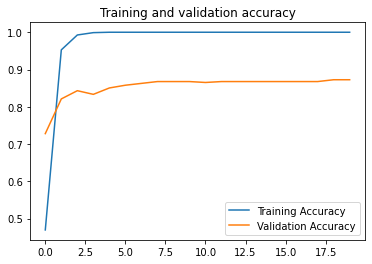

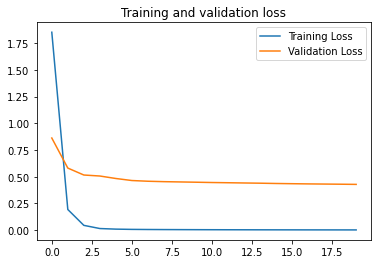

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')

Evaluasi akurasi akhir model pada kumpulan dataset validasi

In [ ]:
validation_generator.reset()
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
model.evaluate(validation_generator, steps=STEP_SIZE_VALID)

8/8 [==============================] - 2s 247ms/step - loss: 0.4283 - categorical_accuracy: 0.8725


[0.42829611897468567, 0.8725489974021912]

Definisikan plotting confusion matrix terlebih dahulu

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title='Normalized confusion matrix'
        else:
            title='Confusion matrix'

        # Calculate chart area size
        leftmargin = 0.5 # inches
        rightmargin = 0.5 # inches
        categorysize = 0.5 # inches
        figwidth = leftmargin + rightmargin + (len(classes) * categorysize)           

        f = plt.figure(figsize=(figwidth, figwidth))

        # Create an axes instance and ajust the subplot size
        ax = f.add_subplot(111)
        ax.set_aspect(1)
        f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

        res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

        plt.title(title)
        plt.colorbar(res)
        ax.set_xticks(range(len(classes)))
        ax.set_yticks(range(len(classes)))
        ax.set_xticklabels(classes, rotation=45, ha='right')
        ax.set_yticklabels(classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        # plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Evaluasi klasifikasi dengan menggunakan confusion matrix

<Figure size 432x288 with 0 Axes>

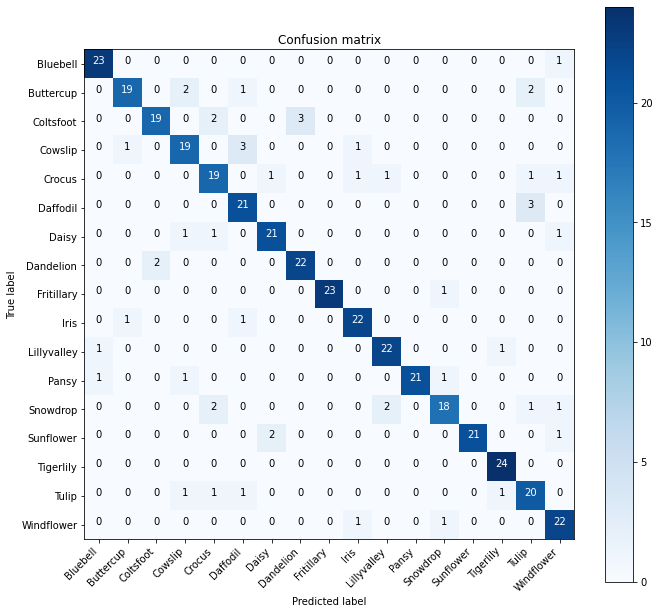

<Figure size 432x288 with 0 Axes>

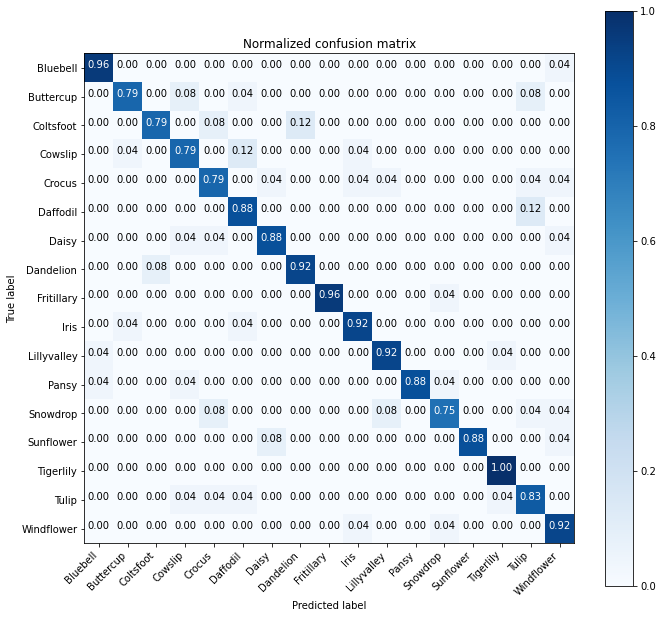

In [ ]:
validation_generator.reset()
Y_pred = model.predict(validation_generator, steps=STEP_SIZE_VALID)
y_pred = np.argmax(Y_pred, axis=1)
target_names = !cat labels.txt

cm = confusion_matrix(validation_generator.classes, y_pred)

# Compute confusion matrix
cnf_matrix = cm
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, title='Normalized confusion matrix')

plt.show()

Evaluasi klasifikasi dengan laporan klasifikasi (classification report)

In [ ]:
print('Classification Report')
target_names = !cat labels.txt
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Bluebell       0.92      0.96      0.94        24
   Buttercup       0.90      0.79      0.84        24
   Coltsfoot       0.90      0.79      0.84        24
     Cowslip       0.79      0.79      0.79        24
      Crocus       0.76      0.79      0.78        24
    Daffodil       0.78      0.88      0.82        24
       Daisy       0.88      0.88      0.88        24
   Dandelion       0.88      0.92      0.90        24
  Fritillary       1.00      0.96      0.98        24
        Iris       0.88      0.92      0.90        24
 Lillyvalley       0.88      0.92      0.90        24
       Pansy       1.00      0.88      0.93        24
    Snowdrop       0.86      0.75      0.80        24
   Sunflower       1.00      0.88      0.93        24
   Tigerlily       0.92      1.00      0.96        24
       Tulip       0.74      0.83      0.78        24
  Windflower       0.81      0.92      0.86        24

    

Simpan model dan konversikan kedalam format TensorFlow Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open ("tl_mobilenetv2_oxford17.tflite" , "wb") .write(tflite_model)

13112448